In [154]:
# Profitability for genre/box office 


# Dependencies

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
# Import data from .txt file

with open('movie_data.txt') as json_file:
    data = json.load(json_file)


In [212]:
# Extract and sort genre information

genres = {}
genre_list = []
genre_list_all = []
genre_box = {}

for year in list(data.keys()):
    movies = list(data[year].keys())
    genre_list = []
    boxes = []
    for movie in movies:
        try:
            genre = data[year][movie]['Genre'].split(', ')
            box = data[year][movie]['BoxOffice']
            box_vals=[]
            for i in genre:
                genre_list.append(i)
                boxes.append(box)
                genre_list_all.append(i)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    genres[year] = genre_list
    genre_box[year] = boxes

g_df={}
for year in list(data.keys()):
    gbox={}
    for i in range(len(genre_box[year])):
        
        if genres[year][i] not in list(gbox.keys()):
            gbox[genres[year][i]] = [genre_box[year][i]]
        else:
            gbox[genres[year][i]].append(genre_box[year][i])
    g_df[year] = gbox

for y in list(g_df.keys()):
    for g in list(g_df[y].keys()):
        g_df[y][g] = {'box_total': sum(g_df[y][g]),
                      'movie_genre_count': len(g_df[y][g]),
                      'box_per_movie': sum(g_df[y][g])/len(g_df[y][g])}

# Example
g_df['2002']
        
# g_df is a dictionary that contains all genre data sorted by year


{'Action': {'box_total': 2706221717,
  'movie_genre_count': 18,
  'box_per_movie': 150345650.94444445},
 'Adventure': {'box_total': 3015641251,
  'movie_genre_count': 18,
  'box_per_movie': 167535625.05555555},
 'Sci-Fi': {'box_total': 742369986,
  'movie_genre_count': 4,
  'box_per_movie': 185592496.5},
 'Fantasy': {'box_total': 937191359,
  'movie_genre_count': 6,
  'box_per_movie': 156198559.83333334},
 'Family': {'box_total': 763186019,
  'movie_genre_count': 6,
  'box_per_movie': 127197669.83333333},
 'Drama': {'box_total': 2285567432,
  'movie_genre_count': 20,
  'box_per_movie': 114278371.6},
 'Mystery': {'box_total': 678184889,
  'movie_genre_count': 5,
  'box_per_movie': 135636977.8},
 'Comedy': {'box_total': 2178070535,
  'movie_genre_count': 18,
  'box_per_movie': 121003918.6111111},
 'Romance': {'box_total': 735096919,
  'movie_genre_count': 6,
  'box_per_movie': 122516153.16666667},
 'Animation': {'box_total': 460418666,
  'movie_genre_count': 4,
  'box_per_movie': 1151046

In [213]:
# For each genre, list genre revenue per movie for all years

unique_genres = pd.Series(genre_list_all).unique()
unique_genres

box_val_time={}
for i in unique_genres:
    rev = []
    for year in list(g_df.keys()):
        try:
            rev.append(g_df[year][i]['box_per_movie'])
        except:
            rev.append(0)
    box_val_time[i] = rev

# Example
box_val_time["Adventure"]

# box_val_time is a dict with keys are unique genres and values are lists of revenue per genre per movie for each year (in order; for plotting values)


[76147137.14285715,
 20940526.2,
 47417173.833333336,
 74090834.3,
 52719087.81818182,
 56484832.9375,
 75806925.25,
 40026837.833333336,
 75469762.28571428,
 109452355.625,
 115161877.0,
 75448773.0,
 104914780.0,
 89117042.3,
 113796477.125,
 102594892.6,
 105980965.6,
 101491040.1875,
 97181753.6923077,
 175159659.0,
 120612539.66666667,
 174098874.6153846,
 167535625.05555555,
 147561110.2142857,
 185057741.85714287,
 181417770.53333333,
 147594769.875,
 203924965.5,
 146850920.0,
 223824930.84210527,
 185354819.2,
 184099878.8,
 195103589.07692307,
 193004923.04761904,
 184521710.32,
 255051990.66666666,
 197222375.96296296,
 214920418.39130434,
 249100372.04545453,
 237180205.6,
 70811252.5]

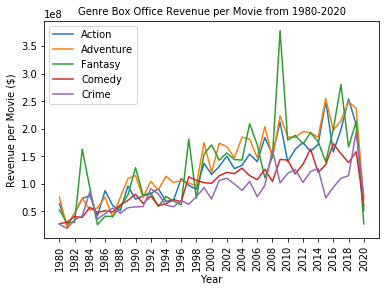

In [214]:
# Plotting genre value

x_vals = list(g_df.keys())
y_vals = []

for g in unique_genres[:5]:
    y_vals = box_val_time[g]
    plt.plot(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_genres[:5]);
plt.title('Genre Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()


In [215]:
# Create DataFrame for genre counts per year (not meaningful when 
# unprocessed due to the fact each year has diff number of movies)

genre_df = {}
genre_stats = {}
for i in list(genres.keys()):
    genre_df[i] = pd.Series(genres[i]).value_counts()
    genre_stats[i] = pd.Series(genres[i])
genre_df = pd.DataFrame(data = genre_df)
genre_stats = pd.DataFrame(data = genre_stats).describe()
genre_df = genre_df.fillna(0)
genre_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Action,9.0,9.0,9.0,10.0,15.0,12.0,10.0,9.0,11.0,10.0,...,15.0,21.0,15.0,27.0,17.0,22.0,25.0,20.0,19.0,13.0
Adventure,7.0,10.0,6.0,10.0,11.0,16.0,8.0,6.0,7.0,8.0,...,20.0,26.0,21.0,25.0,21.0,27.0,23.0,22.0,25.0,8.0
Animation,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,9.0,7.0,9.0,7.0,7.0,10.0,8.0,7.0,8.0,2.0
Biography,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,1.0
Comedy,25.0,20.0,19.0,19.0,23.0,21.0,26.0,27.0,22.0,23.0,...,21.0,18.0,16.0,18.0,20.0,19.0,18.0,18.0,17.0,12.0


In [216]:
# Statistics on genre 

genre_count = genre_stats.loc['count']
top_genres = genre_stats.loc['top']
top_genre_count = genre_stats.loc['freq']
top_genre_percent_of_genres = top_genre_count/genre_count
genre_stats.loc['percent of genres'] = top_genre_percent_of_genres

movie_count = []
for year in list(data.keys()):
    movie_count.append(len(list(data[year].keys())))
movie_count = pd.Series(movie_count,list(data.keys()))
top_genre_percent_of_movies = top_genre_count/movie_count
top_genre_percent_of_movies
genre_stats

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,119,113,79,94,101,110,95,105,91,91,...,115,132,112,128,113,128,125,132,126,90
unique,19,19,15,15,15,18,15,15,16,15,...,17,18,16,16,17,15,16,17,16,16
top,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,...,Comedy,Adventure,Adventure,Action,Adventure,Adventure,Action,Adventure,Adventure,Drama
freq,25,20,19,19,23,21,26,27,22,23,...,21,26,21,27,21,27,25,22,25,15
percent of genres,0.210084,0.176991,0.240506,0.202128,0.227723,0.190909,0.273684,0.257143,0.241758,0.252747,...,0.182609,0.19697,0.1875,0.210938,0.185841,0.210938,0.2,0.166667,0.198413,0.166667


In [217]:
# Movie info DataFrame

movie_df = pd.DataFrame(movie_count,columns=['Movie Count'])
movie_df["Most Frequent Genre"] = top_genres
movie_df['Frequency of Genre'] = top_genre_count
movie_df['Percent of movies with top genre'] = top_genre_percent_of_movies*100
movie_df.head()

,Movie Count,Most Frequent Genre,Frequency of Genre,Percent of movies with top genre
1980,47,Comedy,25,53.1915
1981,47,Comedy,20,42.5532
1982,33,Comedy,19,57.5758
1983,39,Comedy,19,48.7179
1984,41,Comedy,23,56.0976


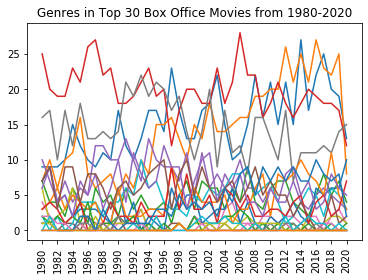

In [218]:
# Plotting all genres over time

years = list(genres.keys())

#genre_plot = ['Action','Drama','Adventure']
#markers = ['-', '--', '-.', ':']

for i in range(len(unique_genres)):
    plt.plot(years,genre_df.loc[unique_genres[i]],ls='-')

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
#plt.legend(genre_plot);
plt.title('Genres in Top 30 Box Office Movies from 1980-2020')
plt.show()

# obviously very messy, just plotting to see. maybe we can subplot

In [9]:


# if genre = 'action'
# then add box office value to 'action' total value, per year
# more meaningful data




In [44]:
movie_df.head()

,Movie Count,Most Frequent Genre,Frequency of Genre,Percent of movies with top genre
1980,47,Comedy,13,27.6596
1981,47,Comedy,16,34.0426
1982,33,Comedy,16,48.4848
1983,39,Drama,15,38.4615
1984,41,Comedy,15,36.5854


In [10]:
rating_values = {}


for movie in list(data[year].keys()):
    
    BO = data[year][movie]['BoxOffice']
    
    if data[year][movie]['Rated'] == 'PG':
        rating_values['PG'] = rating_values['PG'] + data[year][movie]['BoxOffice']

KeyError: 'PG'